In [1]:
%matplotlib inline

In [ ]:
import numpy as np
from typing import List

def find_winner(bet_dict: dict, results: List):
    names = []
    scores = []
    size = len(results)
    for gambler in bet_dict:
        gambler_correct_indices = np.array([
            np.argwhere(np.array(bets[gambler]) == results[i])[0, 0]
            for i in range(size)
        ]).ravel()
        order = np.arange(size)
        weight = 1 / (1 + order)
        score = np.sum( weight * np.abs(gambler_correct_indices - order) )
        names.append(gambler)
        scores.append(score)
    winner_index = np.argsort(scores)
    for i, (name, name_score) in enumerate(zip(np.array(names)[winner_index], np.array(scores)[winner_index])):
        print(f"#{i}, {name}, score={name_score}")

bets = {
    "alan": ["a", "b", "c", "e", "d"], #2
    "corentin": ["b", "a", "c", "d", "e"],#5
    "emilie": ["a", "b", "c", "d", "e"],
    "claire": ["a", "c", "b", "d", "e"], # 4
    "lucas": ["a", "b", "d", "c", "e"], #3 
}
results = ["a", "b", "c", "d", "e"]

find_winner(bets, results)

#0, emilie, score=0.0
#1, alan, score=0.45
#2, lucas, score=0.5833333333333333
#3, claire, score=0.8333333333333333
#4, corentin, score=1.5


In [53]:
import os
datapath = "/Users/Desktop/"
# filename = "TestDP3.sh"
filename = "/Users/Desktop/TestDP3.sh"

parsing = lambda p: os.path.join(datapath, p.lower()) if not os.path.isabs(p) else os.path.join(os.path.dirname(p), os.path.basename(p).lower())

parsing(filename)

'/Users/Desktop/testdp3.sh'

In [7]:
from exoschedule.functions import (
    bookings_from_vcr,
    get_exoplanet_dict,
    get_star_dict,
    update_exposure_time,
    find_directories,
    clear_exposure_time,
    get_source_directories,
    get_source_exposure_time,
    update_minimal_elevation
)
from exoschedule.schedule import (
    build_observation_blocks,
    initialize_schedule,
    book_observations,
    plot_schedule
)

from astropy.time import Time

SyntaxError: invalid syntax (890380634.py, line 4)

In [3]:
exop = get_exoplanet_dict()
star = get_star_dict()

In [4]:
exop = update_minimal_elevation(exop, save=True)
star = update_minimal_elevation(star, save=True)

2025-04-01 18:01:03 | INFO: Updating '/Users/aloh/anaconda3/envs/py311/lib/python3.11/site-packages/exoschedule/exoplanets.json'...
2025-04-01 18:01:03 | INFO: Updating '/Users/aloh/anaconda3/envs/py311/lib/python3.11/site-packages/exoschedule/stars.json'...


In [4]:
# Modify minimal obs time
# from exoschedule.functions import _modify_json_files
# for ep in exop:
#     exop[ep]["minimal_obs_time_minutes"] = 60
# for st in star:
#     star[st]["minimal_obs_time_minutes"] = 60
# _modify_json_files(exop)
# _modify_json_files(star)

In [4]:
start_time=Time("2025-03-04T00:00:00")
stop_time=Time("2025-03-11T00:00:00")

In [5]:
booking_slots = bookings_from_vcr(
    vcr_current_booking="/Users/aloh/Documents/Work/NenuFAR/LT02_Exoplanets/Weekly_Schedule/TESTS/2025_march_week1/2025-03-03_booking.csv",
    start_time=start_time,
    stop_time=stop_time,
    merge_slots=False
)

2025-03-17 11:00:40 | INFO: Booking < min_duration (3600.0s): 2025-03-08T02:52:00.000 - 2025-03-08T03:00:00.000 --> skipped.


In [7]:
# DATA_REPOSITORIES = (
#     "/databf/nenufar/ES02",
#     "/databf/nenufar/LT02"
# )
# exop = update_exposure_time(exop, *DATA_REPOSITORIES, save=True)
# star = update_exposure_time(star, *DATA_REPOSITORIES, save=True)
# exop = update_minimal_elevation(exop, save=True)
# star = update_minimal_elevation(star, save=True)

In [6]:
blocks = build_observation_blocks(exop)
blocks += build_observation_blocks(star)
blocks *= 2#args.max_repetitions

In [7]:
scheduled_observations = book_observations(
    booking_starts_stops=booking_slots,
    source_dict={**exop, **star},
    observation_blocks=blocks,
    priority_sources=["GJ_687"]
)

2025-03-17 11:00:42 | INFO: Booking the schedule...
2025-03-17 11:00:42 | INFO: Creating a Schedule from 2025-03-04T06:00:00.000 to 2025-03-10T17:00:00.000...
2025-03-17 11:00:43 | INFO: Sorting observation blocks using type_factor=2, exposure_factor=2, last_observation_factor=1...
2025-03-17 11:00:43 | INFO: Observation of GJ_687 defined as a priority.
2025-03-17 11:00:43 | INFO: Evaluating observation block constraints over the schedule...
2025-03-17 11:00:43 | WARNING: <ObsBlock> #48 'TAU_BOO' has a null score over the schedule.
2025-03-17 11:00:43 | WARNING: <ObsBlock> #49 'TAU_BOO' has a null score over the schedule.
2025-03-17 11:00:43 | WARNING: <ObsBlock> #50 'Qatar_2' has a null score over the schedule.
2025-03-17 11:00:43 | WARNING: <ObsBlock> #51 'Qatar_2' has a null score over the schedule.
2025-03-17 11:00:43 | WARNING: Constraint <ElevationConstraint(elevationMin=20.0 deg)> evaluated for target '<SkyCoord (ICRS): (ra, dec) in deg
    (288.88791667, -24.17938889)>' cannot 

In [14]:
from astropy.time import Time, TimeDelta
import numpy as np
int(np.ceil((scheduled_observations.time_max - scheduled_observations.time_min) / TimeDelta(1, format="jd")))

7

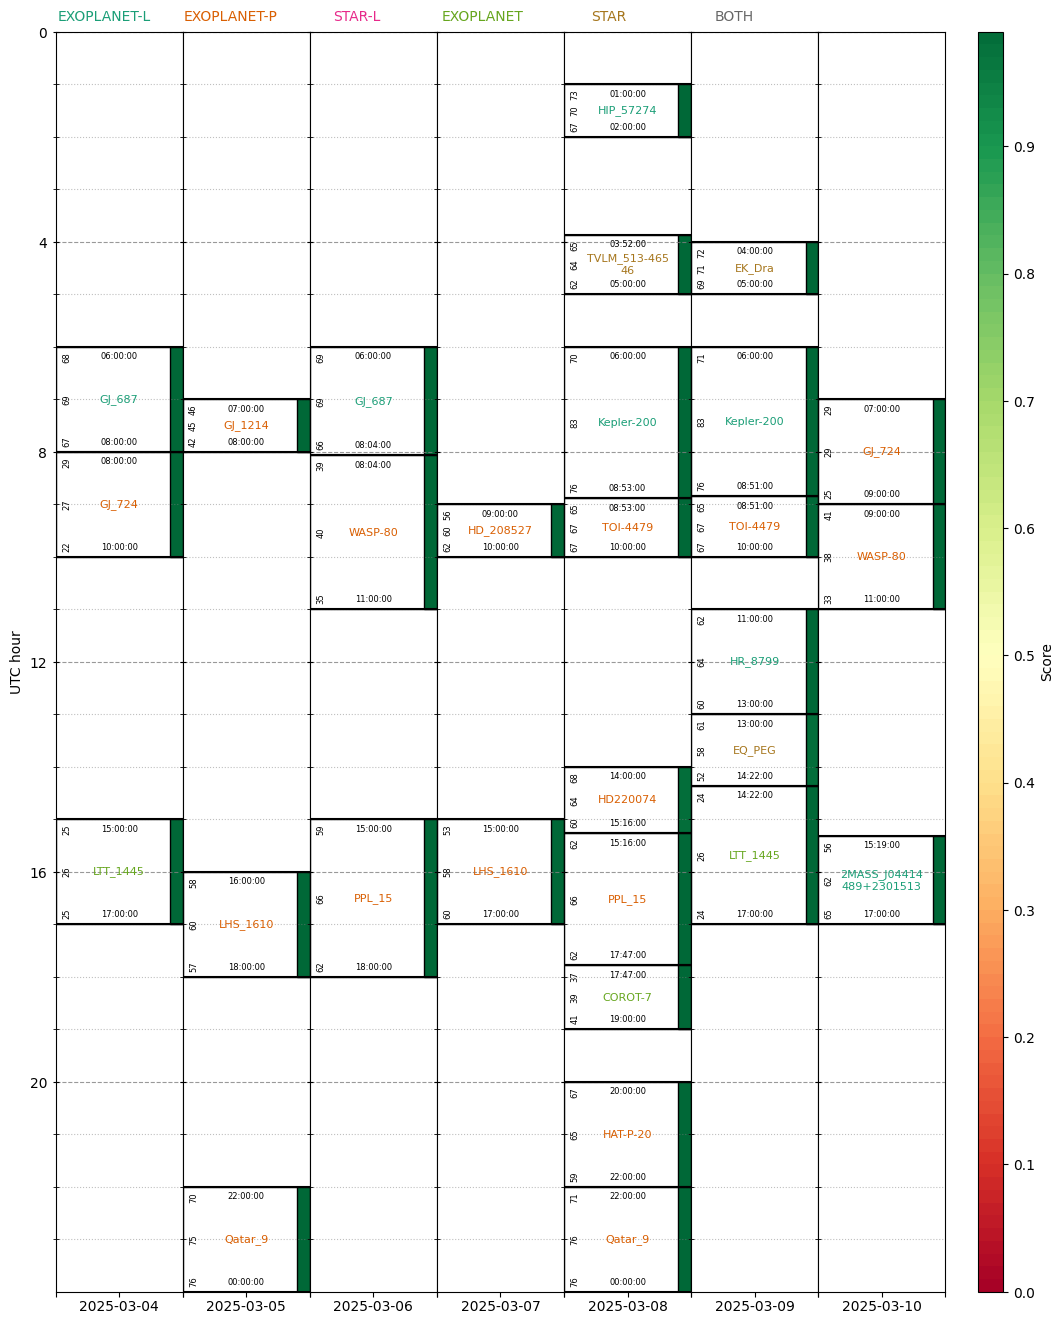

In [47]:
plot_schedule(
    schedule=scheduled_observations,
    source_dict={**exop, **star},
    output_path="",
)

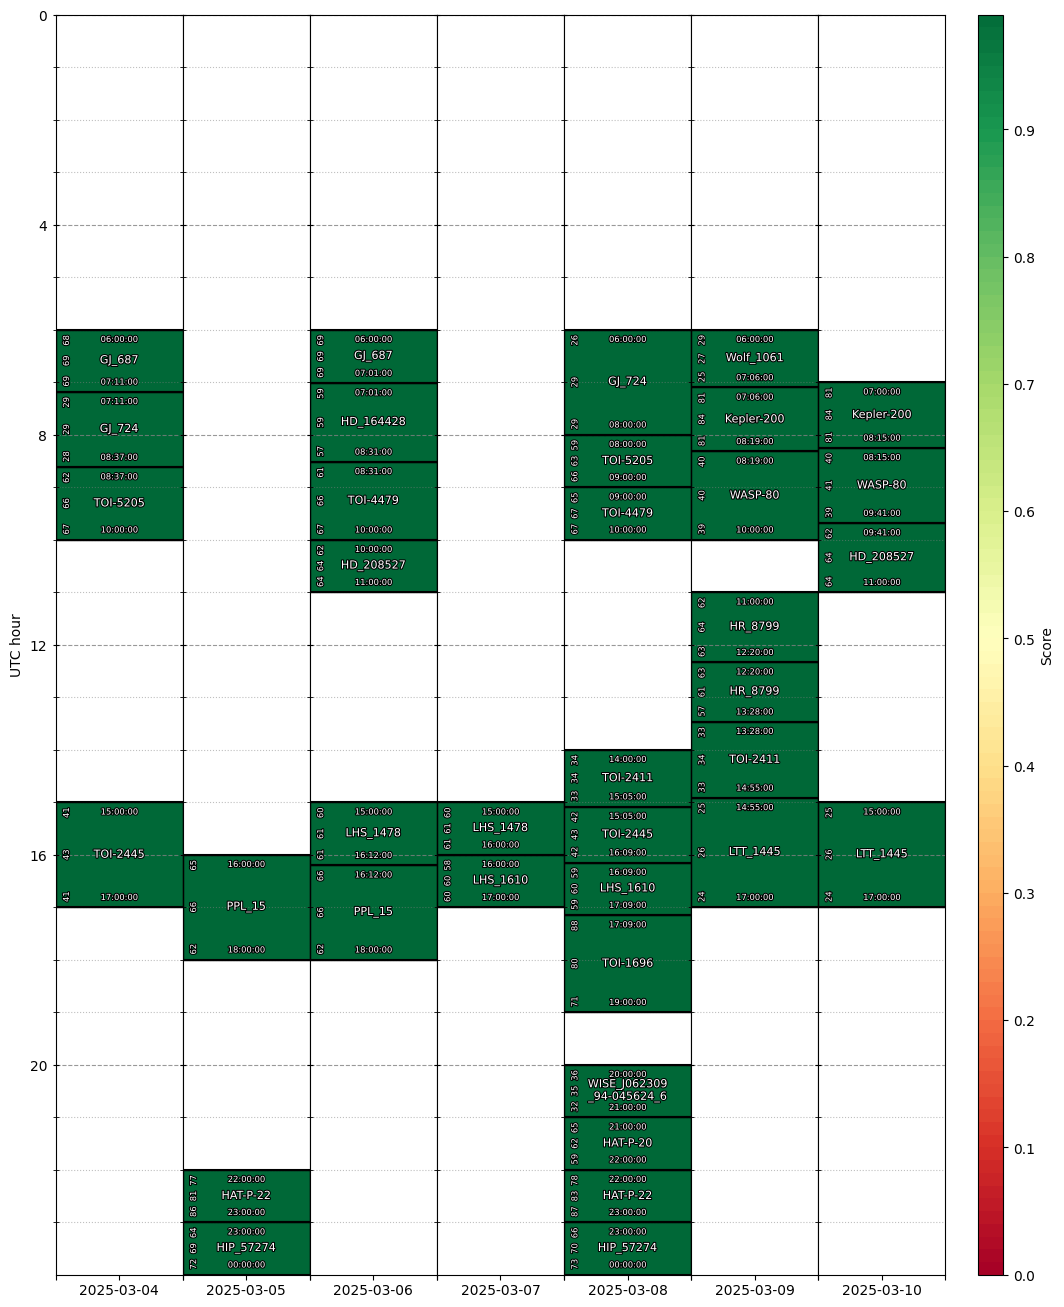

In [10]:
plot_schedule(
    schedule=scheduled_observations,
    source_dict={**exop, **star},
    output_path="",
)

In [11]:
results = scheduled_observations.export()
results

obsid,name,program,start,stop,score
int64,str24,str4,Time,Time,float64
68,GJ_687,lt02,2025-03-04T06:00:00.000,2025-03-04T07:11:00.000,1.0
72,GJ_724,lt02,2025-03-04T07:11:00.000,2025-03-04T08:37:00.000,1.0
91,TOI-5205,lt02,2025-03-04T08:37:00.000,2025-03-04T10:00:00.000,1.0
7,TOI-2445,lt02,2025-03-04T15:00:00.000,2025-03-04T17:00:00.000,1.0
16,PPL_15,lt02,2025-03-05T16:00:00.000,2025-03-05T18:00:00.000,1.0
37,HAT-P-22,lt02,2025-03-05T22:00:00.000,2025-03-05T23:00:00.000,1.0
43,HIP_57274,lt02,2025-03-05T23:00:00.000,2025-03-06T00:00:00.000,1.0
69,GJ_687,lt02,2025-03-06T06:00:00.000,2025-03-06T07:01:00.000,1.0
70,HD_164428,lt02,2025-03-06T07:01:00.000,2025-03-06T08:31:00.000,1.0


In [12]:
stop

NameError: name 'stop' is not defined

In [95]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patheffects as PathEffects
import numpy as np
from astropy.time import Time, TimeDelta
import astropy.units as u 
from astropy.coordinates import SkyCoord
from nenupy.astro.target import FixedTarget

In [14]:
result = scheduled_observations.export()

In [111]:
source_dict = {**exop, **star}
source_names = np.array([blk.name for blk in scheduled_observations.observation_blocks])
source_types = np.array([source_dict[name]["source_type"] for name in source_names if source_dict[name]["main_target"]])
exposure = np.array([source_dict[name]["exposure_time_hours"] for name in source_names if source_dict[name]["main_target"]])

In [ ]:
source_types

In [ ]:
exposure / exposure.max()

In [ ]:
obs_directories = find_directories("/databf/nenufar/LT02")

In [ ]:
from exoschedule.functions import get_source_last_observation

get_source_last_observation("HD_189733", obs_directories)

In [ ]:
TYPE_PRIORITY_ORDER = ["exoplanet-l", "exoplanet-p", "star-l", "exoplanet", "star", "both"]
type_index = np.array([TYPE_PRIORITY_ORDER.index(src_type) + 1 for src_type in source_types], dtype=float)
type_index /= type_index.max()
exposure_index = exposure / exposure.max()
type_factor = 1
exposure_factor = 2
sorted_indices = np.argsort(type_factor * type_index + exposure_factor * exposure_index)

for i in range(0, 80, 4):
    print(source_names[sorted_indices][i], source_types[sorted_indices][i], exposure[sorted_indices][i])

In [ ]:
plt.close("all")
source_dict = {**exop, **star}

days = np.unique([dd.split("T")[0] for dd in result["start"].isot])
n_days = np.unique([dd.split("T")[0] for dd in result["start"].isot]).size

fig, axs = plt.subplots(
    nrows=1,
    ncols=n_days,
    figsize=(2 * n_days, 14),
    sharey=True
)
fig.subplots_adjust(wspace=0, top=0.95)
if n_days == 1:
    axs = np.array([axs])

cmap = matplotlib.cm.get_cmap("RdYlGn")

for day_id, day in enumerate(days):

    day_start = Time(day)
    day_end = day_start + TimeDelta(1, format="jd")

    time_mask = ((result["start"] <= day_start) * (result["stop"] >= day_end)) + \
                ((result["start"] <= day_start) * (result["stop"] >= day_start)) +\
                ((result["start"] >= day_start) * (result["stop"] <= day_end)) +\
                ((result["start"] <= day_end) * (result["stop"] >= day_end))
    
    for block in result[time_mask]:
        start = block["start"]
        start.precision = 0
        stop = block["stop"]
        stop.precision = 0

        ymin = start.datetime.hour + start.datetime.minute / 60
        ymax = stop.datetime.hour + stop.datetime.minute / 60
        xmin = 0 # day_id / slots
        xmax = 1 # (day_id + 1) / slots
        axs[day_id].axhspan(
            ymin, ymax,
            xmin, xmax,
            edgecolor="black",
            facecolor=cmap(block["score"])
        )
        axs[day_id].axhline(ymin, color="black", linewidth=1.5)
        axs[day_id].axhline(ymax, color="black", linewidth=1.5)

        skycoord = SkyCoord(
            source_dict[block["name"]]["ra"],
            source_dict[block["name"]]["dec"],
            unit=(u.hourangle, u.deg)
        )
        target = FixedTarget(skycoord, time=Time([block["start"], block["start"] + (block["stop"] - block["start"]) / 2, block["stop"]]))
        text = []
        text_color = "white"
        shadow_color = "black"
        text.append(
            axs[day_id].text(
                xmin + 0.05,
                ymin + 0.1,
                f"{target.horizontal_coordinates[0].alt.deg:.0f}",
                va="top",
                ha="left",
                rotation="vertical",
                fontsize=7,
                color=text_color
            )
        )
        text.append(
            axs[day_id].text(
                xmin + 0.05,
                (ymax + ymin) / 2,
                f"{target.horizontal_coordinates[1].alt.deg:.0f}",
                va="center",
                ha="left",
                rotation="vertical",
                fontsize=7,
                color=text_color
            )
        )
        text.append(
            axs[day_id].text(
                xmin + 0.05,
                ymax - 0.1,
                f"{target.horizontal_coordinates[2].alt.deg:.0f}",
                va="bottom",
                ha="left",
                rotation="vertical",
                fontsize=7,
                color=text_color
            )
        )
        for t in text:
            t.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground=shadow_color)])


        src_name = axs[day_id].text(
            (xmax + xmin) / 2,
            (ymax + ymin) / 2,
            "\n".join([block["name"][i: i + 12] for i in range(0, len(block["name"]), 12)] ),
            va="center",
            ha="center",
            fontsize=9,
            color=text_color
        )
        src_name.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground=shadow_color)])
        txt = axs[day_id].text(
            (xmax + xmin) / 2,
            ymin + 0.1,
            start.isot.split("T")[1],
            va="top",
            ha="center",
            fontsize=7,
            color=text_color
        )
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground=shadow_color)])
        txt = axs[day_id].text(
            (xmax + xmin) / 2,
            ymax - 0.1,
            stop.isot.split("T")[1],
            va="bottom",
            ha="center",
            fontsize=7,
            color=text_color
        )
        txt.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground=shadow_color)])

    axs[day_id].set_xticklabels([])
    axs[day_id].set_xlabel(day, rotation="horizontal", va="center", ha="center")

    axs[day_id].set_ylim(24, 0)
    axs[day_id].set_yticks(np.arange(0, 24, 4))
    axs[day_id].set_yticks(np.arange(0, 24, 1), minor=True)
    axs[day_id].tick_params(axis="y", which="both", direction="inout", length=5)
    axs[day_id].grid(axis="y", which="major", color="gray", alpha=0.8, linestyle="--")
    axs[day_id].grid(axis="y", which="minor", color="gray", alpha=0.5, linestyle=":")

axs[0].set_ylabel("UTC hour")

# cmap = matplotlib.cm.get_cmap("RdYlGn")

# for i, row in enumerate(result):
#     if i == 0:
#         day_id = 0
#     elif row["start"] >= result[i - 1]["start"] + TimeDelta(1, format="jd"):
#         day_id += 1
#     else:
#         pass
#     xmin = row["start"].datetime.hour + row["start"].datetime.minute / 60
#     xmax = row["stop"].datetime.hour + row["stop"].datetime.minute / 60
#     ymin = 0 # day_id / slots
#     ymax = 1 # (day_id + 1) / slots
#     axs[day_id].axvspan(
#         xmin, xmax,
#         ymin, ymax,
#         edgecolor="black",
#         facecolor=cmap(row["score"])
#     )
#     axs[day_id].text((xmax + xmin) / 2, (ymax + ymin) / 2, row["name"], va="center", ha="center", fontsize=8)
#     axs[day_id].axvline(10, color="black", linestyle=":")
#     axs[day_id].axvline(14, color="black", linestyle=":")
#     axs[day_id].set_yticklabels([])
#     axs[day_id].set_ylabel(row["start"].isot.split("T")[0], rotation="horizontal", va="center", ha="right")

norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = fig.colorbar(sm, ax=axs.ravel().tolist(), ticks=np.linspace(0, 1, 11), boundaries=np.arange(0, 1, .01), pad=0.03, aspect=50)
cb.set_label("Score")

# axs[day_id].set_xlabel("UTC Hour")

# if figname is not None:
#     fig.savefig(figname, dpi=300, bbox_inches="tight")


In [ ]:
scheduled_observations.observation_blocks[13].plot()

In [ ]:
scheduled_observations.observation_blocks[16].constraints.plot()

In [ ]:
scheduled_observations.observation_blocks[90].plot()

In [8]:
res = scheduled_observations.export()

In [ ]:
for schedule_row in res:
    print(len(schedule_row))
    source_name = schedule_row["name"]
    time_min = schedule_row["start"]
    time_max = schedule_row["stop"]

In [ ]:
name = "hello"
"EXOPLANET" if name=="hello" else "STAR"

In [ ]:
from astropy.time import Time, TimeDelta
from astropy.coordinates import SkyCoord
import astropy.units as u
from nenupy.astro.target import FixedTarget
import matplotlib.pyplot as plt

times = Time("2025-02-01 00:00:00") + np.arange(48) * TimeDelta(1800, format="sec")

fig = plt.figure(figsize=(12, 7))
src = FixedTarget(SkyCoord(exop["HAT-P-20"]["ra"], exop["HAT-P-20"]["dec"], unit=(u.hourangle, u.deg)), times)
plt.plot(times.datetime, src.horizontal_coordinates.alt.deg, label=f"Main", color="black", linestyle=":")
for option in exop["HAT-P-20"]["off_beams"]:
    for i, off_beam in enumerate(exop["HAT-P-20"]["off_beams"][option]):
        src = FixedTarget(SkyCoord(off_beam["ra"], off_beam["dec"], unit=(u.hourangle, u.deg)), times)
        plt.plot(times.datetime, src.horizontal_coordinates.alt.deg, label=f"{option} {i}")
plt.legend()


In [ ]:
from exoschedule.schedule import write_parset_file
from astropy.table import Table
import numpy as np

rows = Table()
rows["name"] = np.array(["Ceti_Group"])
rows["start"] = Time(["2025-02-08T15:00:00"])
rows["stop"] = Time(["2025-02-08T17:00:00"])

#rows
write_parset_file(rows, {**exop, **star}, "/Users/aloh/Desktop")

In [ ]:
Observation.contactName=philippe.zarka
Observation.name="CETI_GROUP_TRACKING"
Observation.title="STAR_PLANETS"
Observation.contactEmail=philippe.zarka@obspm.fr
Observation.nrBeams=4
Observation.topic=lt02_exoplanets_and_stars
Observation.parsetVersion=1.1
 
Anabeam[0].target="J2000_TRACKING"
Anabeam[0].trackingType=tracking
Anabeam[0].transitDate=2025-02-08T16:04:23Z
Anabeam[0].ra='01:28:00'
Anabeam[0].dec='-17:00:00'
Anabeam[0].startTime=2025-02-08T15:01:10Z
Anabeam[0].duration=7120s
 
Beam[0].target="YZ CET_TRACKING"
Beam[0].simbadSearch=YZ CET
Beam[0].trackingType=tracking
Beam[0].transitDate=2025-02-08T15:48:57Z
Beam[0].startTime=2025-02-08T15:01:10Z
Beam[0].duration=7120s
Beam[0].subbandFrq=[30.1-67.4]
Beam[0].toDo=dynamicspectrum
Beam[0].parameters="tf: df=3.05 dt=21.0 hamm"
 
Beam[1].target="UV CETI_TRACKING"
Beam[1].simbadSearch=UV CETI
Beam[1].trackingType=tracking
Beam[1].transitDate=2025-02-08T16:15:22Z
Beam[1].startTime=2025-02-08T15:01:10Z
Beam[1].duration=7120s
Beam[1].subbandFrq=[30.1-67.4]
Beam[1].toDo=dynamicspectrum
Beam[1].parameters="tf: df=3.05 dt=21.0 hamm"
 
Beam[2].target="GJ 65_TRACKING"
Beam[2].simbadSearch=GJ 65
Beam[2].trackingType=tracking
Beam[2].transitDate=2025-02-08T16:15:22Z
Beam[2].startTime=2025-02-08T15:01:10Z
Beam[2].duration=7120s
Beam[2].subbandFrq=[30.1-67.4]
Beam[2].toDo=dynamicspectrum
Beam[2].parameters="tf: df=3.05 dt=21.0 hamm"
 
Beam[3].target="TAU CETI_TRACKING"
Beam[3].simbadSearch=TAU CETI
Beam[3].trackingType=tracking
Beam[3].transitDate=2025-02-08T16:20:24Z
Beam[3].startTime=2025-02-08T15:01:10Z
Beam[3].duration=7120s
Beam[3].subbandFrq=[30.1-67.4]
Beam[3].toDo=dynamicspectrum
Beam[3].parameters="tf: df=3.05 dt=21.0 hamm"
 
Output.hd_bitMode=16
Output.hd_receivers=[undysputed]

In [ ]:
from nenupy.instru import freq2sb

freq2sb([15.1,52.4]*u.MHz)

In [ ]:
from nenupy.schedule.open_time import _sort_night_time
from astropy.coordinates import Angle

start = Time("2025-02-14 23:00:00")
stop = Time("2025-02-15 05:00:00")
start_angle = Angle(start.isot.split('T')[1], unit="hourangle")
stop_angle = Angle(stop.isot.split('T')[1], unit="hourangle")
if stop_angle < start_angle:
    day1, night1 = _sort_night_time(
        start_hour=start_angle,
        stop_hour=Angle("24", unit="hourangle"),
        current_day=start
    )
    day2, night2 = _sort_night_time(
        start_hour=Angle("00", unit="hourangle"),
        stop_hour=stop_angle,
        current_day=start
    )
    day = day1 + day2
    night = night1 + night2
else:
    day, night = _sort_night_time(
        start_hour=start_angle,
        stop_hour=stop_angle,
        current_day=start
    )
print(day, night)

# _sort_night_time(
#     start_hour=,
#     stop_hour=Angle(stop.isot.split('T')[1], unit="hourangle"),
#     current_day=start
# )

In [ ]:
stop

In [ ]:
import numpy as np

main_dict = {**ep, **stars}

source_names = np.array([blk.name for blk in sch.observation_blocks])
exposure = np.array([main_dict[name]["exposure_time_hours"] for name in source_names])
source_types = np.array([main_dict[name]["source_type"] for name in source_names])

TYPE_PRIORITY_ORDER = ["exoplanet-l", "exoplanet-p", "star-l", "exoplanet", "star"]

In [ ]:
OBSERVATION_CONFIGURATION = {
    "exoplanet": {
        "day": {
            "filter": 3,
            "frequency": [154, 345], # 30.1-67.4 MHz
            "squint": 40,
            "parameters": "tf: df=3.05 dt=21.0 hamm"
        },
        "night": {
            "filter": 2,
            "frequency": [108, 299], # 21.1-58.4 MHz
            "squint": 40,
            "parameters": "tf: df=3.05 dt=21.0 hamm"
        }
    },
    "star": {
        "day": {
            "filter": 2,
            "frequency": [61, 444], # 12-86.8 MHz
            "squint": 60,
            "parameters": "tf: df=3.05 dt=42.0 hamm"
        },
        "night": {
            "filter": 1,
            "frequency": [61, 444], # 12-86.8 MHz
            "squint": 60,
            "parameters": "tf: df=3.05 dt=42.0 hamm"
        }
    }
}

CONFIG_EXCEPTION = {
    "CR_DRA": {
        "day": { 
            "frequency": [187, 378] # 36.5-73.8 MHz
        }
    },
    "TAU_BOO": {
        "night": {
            "frequency": [77, 268], # 15.1-52.4 MHz
            "filter": 1
        }
    }
}

print(OBSERVATION_CONFIGURATION["exoplanet"]["day"])

day_period = "day"
source_name = "TAU_BOO"
source_type = "exoplanet"


# Observation configuration
config = OBSERVATION_CONFIGURATION[source_type.lower()][day_period]
# Modify the config by the exceptions
try:
    config.update(CONFIG_EXCEPTION[source_name][day_period])
except KeyError:
    pass

print(config)

In [ ]:
sch.book(
    very_strict=True,
    # sort_by_availability=True,
    reset_booking=True,
    sort_by_indices=sort_idx
)

minimal_score = 0.5

# Remove low score observations
for blk in sch.observation_blocks:
    if (blk.score <= minimal_score) and blk.isBooked:
        # Free the schedule slots
        sch.freeSlots[blk.startIdx:blk.startIdx + blk.nSlots] = True
        if blk.n_delay_slots != 0:
            sch.free_processing_slots[blk.startIdx - blk.n_delay_slots - 1: blk.startIdx + blk.nSlots + blk.n_delay_slots] = True
        # Reset the observation block as un-booked
        blk.startIdx = None

sch.extend_scheduled_observations(
    relative_score_threshold=0.9,
)

In [ ]:
sch.plot(grid=False)

In [ ]:
sch.export()